In [37]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

# Программа вычисления ДПФ гармонического сигнала 

In [10]:
t1 = float(input('Введите начало интервала: '))
t2 = float(input('Введите конец интервала: '))
N  = float(input('Введите количество точек: '))

Введите начало интервала: 0
Введите конец интервала: 0.05
Введите количество точек: 64


In [15]:
def task1(t1, t2, N, plot):
    f0 = 2000
    mvis= 4
    fdn = 2*f0
    fdv = mvis*fdn
    t   = np.arange(t1, t2, (t2-t1)/N)  # Вектор времени, с
    y   = np.cos(2*np.pi*f0*t)  # Вектор сигнала
    stime = -time()
    # Дискретное преобразование Фурье
    k   = np.arange(N)
    Ex  = np.exp(np.complex(0,-1)*2*np.pi/N*np.dot(np.transpose(k),k))
    Y   = y*Ex
    stime = stime + time()
    # Обратное дискретное преобразование Фурье
    Ex  = np.exp(np.complex(0,1)*2*np.pi/N*np.dot(np.transpose(k),k))
    ys  = Y/(N-1)*Ex
    
    Y2  = Y*np.conj(Y)  # Квадрат модуля Фурье-образа
    ff  = k*fdv/N # Вектор частоты, Гц
    if plot:
        plt.plot(ff, np.real(Y2), 'r-*')
        plt.xlabel('Frequency, Hz')
        plt.ylabel('Fourier-image modulus squared')
        plt.grid()
        plt.show()
        pylab.subplot (2, 2, 1)
        pylab.grid()
        pylab.plot(t,np.real(y), 'r-*')
        pylab.xlabel('Time, s')
        pylab.ylabel('Initial signal')
        pylab.title('Real part')
        pylab.subplot (2, 2, 2)
        pylab.grid()
        pylab.plot(t,np.imag(y), 'b-*')
        pylab.xlabel('Time, s')
        pylab.ylabel('Initial signal')
        pylab.title('Imag part')
        pylab.subplot (2, 2, 3)
        pylab.grid()
        pylab.plot(t,np.real(ys), 'r-*')
        pylab.xlabel('Time, s')
        pylab.ylabel('Restored signal')
        pylab.title('Real part')
        pylab.subplot (2, 2, 4)
        pylab.grid()
        pylab.plot(t,np.imag(ys), 'b-*')
        pylab.xlabel('Time, s')
        pylab.ylabel('Restored signal')
        pylab.title('Imag part')
        pylab.show()
    return stime


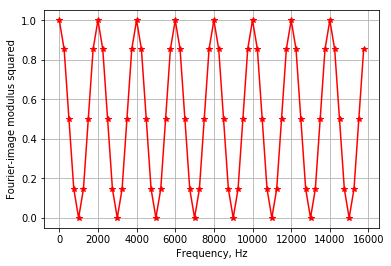

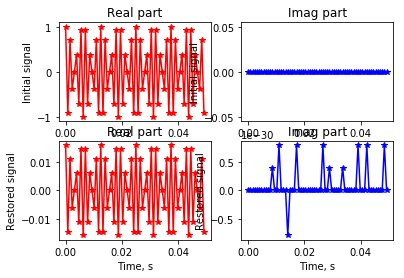

0.0

In [16]:
task1(t1, t2, N, True)


In [17]:
def task2(t1, t2, N, plot):
    f0 = 2000
    mvis= 4
    fdn = 2*f0
    fdv = mvis*fdn
    t   = np.arange(t1, t2, (t2-t1)/N)  # Вектор времени, с
    y   = np.cos(2*np.pi*f0*t)  # Вектор сигнала
    stime = -time()
    # Быстрое преобразование Фурье
    Y   = np.fft.fft(y)

    stime = stime + time()
    # Обратное дискретное преобразование Фурье
    
    ys  = np.fft.ifft(Y)
    k   = np.arange(N)
    Y2  = Y*np.conj(Y)  # Квадрат модуля Фурье-образа
    ff  = k*fdv/N # Вектор частоты, Гц
    if plot:
        plt.plot(ff, np.real(Y2), 'r-*')
        plt.grid()
        plt.xlabel('Frequency, Hz')
        plt.ylabel('Fourier-image modulus squared')
        plt.show()
        pylab.subplot (2, 2, 1)
        pylab.grid()
        pylab.plot(t,np.real(y), 'r-*')
        pylab.xlabel('Time, s')
        pylab.ylabel('Initial signal')
        pylab.title('Real part')
        pylab.subplot (2, 2, 2)
        pylab.grid()
        pylab.plot(t,np.imag(y), 'b-*')
        pylab.xlabel('Time, s')
        pylab.ylabel('Initial signal')
        pylab.title('Imag part')
        pylab.subplot (2, 2, 3)
        pylab.grid()
        pylab.plot(t,np.real(ys), 'r-*')
        pylab.xlabel('Time, s')
        pylab.ylabel('Restored signal')
        pylab.title('Real part')
        pylab.subplot (2, 2, 4)
        pylab.grid()
        pylab.plot(t,np.imag(ys), 'b-*')
        pylab.xlabel('Time, s')
        pylab.ylabel('Restored signal')
        pylab.title('Imag part')
        pylab.show()
    return stime

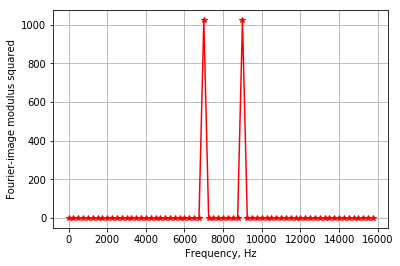

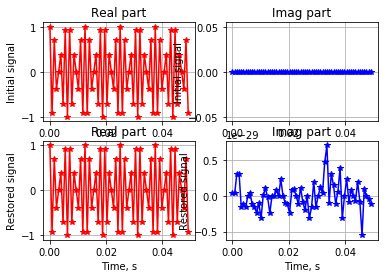

0.0

In [18]:
task2(t1, t2, N, True)

In [19]:
times1 = []
times2 = []
for i in range(15, 20, 1):
    times1.append((task1(t1, t2, 2**i, False)))
    times2.append((task2(t1, t2, 2**i, False)))


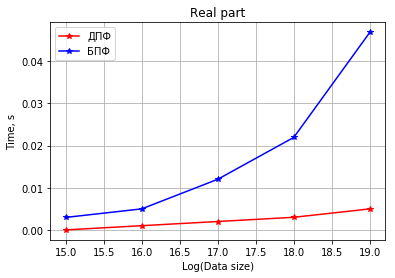

In [21]:
plt.plot(range(15, 20, 1),times1,'r-*')
plt.plot(range(15, 20, 1),times2,'b-*')
plt.title("Real part")
plt.xlabel('Log(Data size)')
plt.ylabel('Time, s')
plt.legend(['ДПФ', 'БПФ'])
plt.grid()

In [26]:
def sigmoid(v, a):
    y = 1/(1+np.exp(-a*v))
    plt.plot(v,y,'b-*')
    plt.grid()

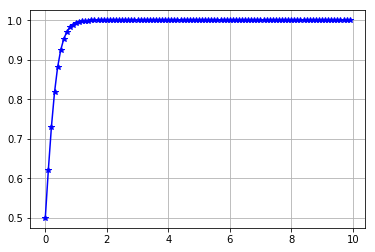

In [27]:
v=np.arange(0, 10, 0.1)
sigmoid(v, 5)

In [28]:
def sigmoid(v, a):
    y = np.tanh(v/a)
    plt.plot(v,y,'b-*')
    plt.grid()

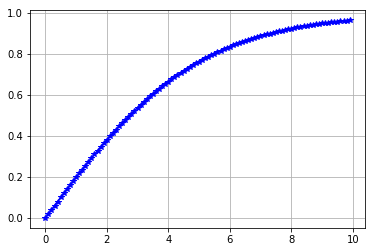

In [29]:
sigmoid(v, 5)

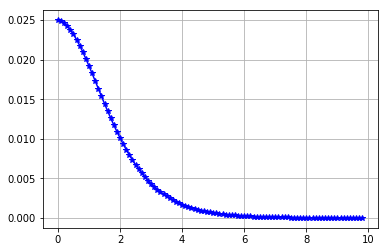

In [36]:
y = 1/(1+np.exp(-v))
dy = np.diff(y)

plt.plot(v[:99],dy,'b-*')
plt.grid()